In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.io import fits
import astropy.io.fits as fits
import astropy
from astropy.table import Table, join, hstack, vstack
import healpy as hp
from esutil import htm


In [2]:
def match(cat_1, cat_2, column_1, column_2, column_3, column_4,error):
    h = htm.HTM(depth=10)
    m1, m2, d12 = h.match(np.array(cat_1[column_1]), 
                          np.array(cat_1[column_3]),
                          np.array(cat_2[column_2]), 
                          np.array(cat_2[column_4]),
                          error, maxmatch=1)
    
    submatched = cat_1[m1]
    manmatched = cat_2[m2]
    matched = hstack([submatched, manmatched])
      
    return matched

def add_randomcol(cat):
    """Input: 
    cat: DataFrame
    Output:
    DataFrame with a random column
    """
    data.add_column(1.5, name = 'random')
    for i in range(0, len(data)):
            data[i]['random'] = np.random.random()
    return cat


In [3]:
def match_catalogues(path_dir, path_new,column1,column2, column3, column4):
    for i,filename in enumerate(os.listdir(path_dir)):
        file_ = Table.read(os.path.join(path_dir,filename))
        data = match(gama, file_,column1, column2,column3,column4,error)
        if len(data) != 0:
            filename = 'match_' + filename
            data.write(os.path.join(path_new,filename))
    return None
                

In [4]:
def hist_dir(path_dir, col, color):
    for i,filename in enumerate(os.listdir(path_dir)):
        file = Table.read(os.path.join(path_dir,filename))
        file = file[file[col] > 0 ]
        plt.hist(file[col],color = 'orange', bins = 100)
    plt.hist(cut[col], bins = 100, color = color)
    return None

In [5]:
ps1 = '/home/priscila/devel/mestrado/resultados/ps1gamacat'
#ps1mean = gluetable(ps1)
ps2 = '/home/priscila/devel/mestrado/resultados/ps1gamag02cat'
#ps2mean = gluetable(ps2)
#desgama =  gluetable(des)


In [6]:
GP1 = Table.read('/home/priscila/devel/mestrado/resultados/PS1_CROSS_GAMA_CROSS_INPUTCATA.fits')
GP2 = Table.read('/home/priscila/devel/mestrado/resultados/PS1_CROSS_GAMA_CROSS_G02INPUTCAT.fits')
#GD = Table.read('/home/priscila/devel/mestrado/resultados/desgama.fits')
#PF = Table.read('/home/priscila/devel/mestrado/resultados_pixel/zfilipeps1.fits')
gama = Table.read('/home/priscila/devel/mestrado/gama.fits')

In [7]:
CROSS_FINAL = vstack(GP1,GP2)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


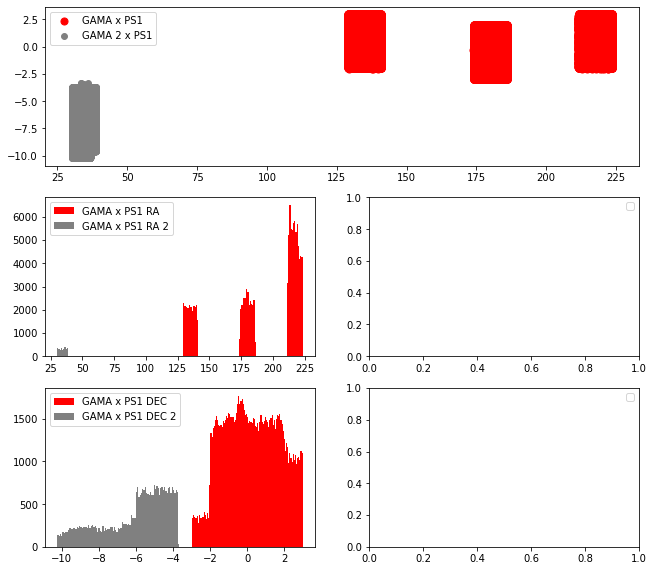

In [8]:
fig = plt.figure()
grid = plt.GridSpec(3,2, top = 2,right = 1.5)
ax = plt.subplot(grid[0,:])
plt.scatter(GP1['RA_1'], GP1['DEC_1'], s = 50, color = 'red', label = 'GAMA x PS1')
plt.scatter(GP2['RA_1'], GP2['DEC_1'], s = 35, color = 'grey', label = 'GAMA 2 x PS1')
#plt.scatter(PF['RA'], PF['DEC'], s = 15, color = 'orange', label = 'PS1 x Filipe')
#plt.scatter(GD['RA'], GD['DEC'], s = 35, color = 'blue', label = 'GAMA x DES')

plt.legend()
ax = plt.subplot(grid[1,0])
plt.hist(GP1['RA_1'], label = 'GAMA x PS1 RA', color = 'red', bins = 100)
plt.hist(GP2['RA_1'], label = 'GAMA x PS1 RA 2', color = 'grey', bins = 100)
#plt.hist(PF['RA'], label = 'PS1 x Filipe', color = 'orange', bins = 100)

plt.legend()
ax = plt.subplot(grid[1,1])
#plt.hist(GD['RA'], label = 'GAMA x DES RA', color = 'blue', bins = 100)
plt.legend()
ax = plt.subplot(grid[2,0])
plt.hist(GP1['DEC_1'], label = 'GAMA x PS1 DEC', color = 'red', bins = 100)
plt.hist(GP2['DEC_1'], label = 'GAMA x PS1 DEC 2', color = 'grey', bins = 100)
#plt.hist(PF['DEC'], label = 'PS1 x Filipe', color = 'orange', bins = 100)

plt.legend()
ax = plt.subplot(grid[2,1])
#plt.hist(GD['DEC'], label = 'GAMA x DES DEC', color = 'blue', bins = 100)

plt.legend()

''

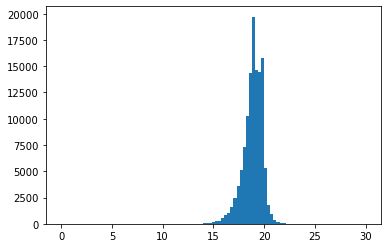

In [9]:

plt.hist(GP1['rKronMag'], bins = np.linspace(0,30, 100))
;

In [10]:
def separa(table, col1, col2, min_ra, max_ra, min_dec, max_dec):
    region = table[table[col1] > min_ra]
    region = region[region[col1] < max_ra]
    region = region[region[col2]> min_dec]
    region = region[region[col2]< max_dec]
    return region

def param(type_):
    if type_ == '02':
        return (30.2, 38.3, -10.25, -3.72 ) 
    elif type_ == '09':
        return (129.0, 141.0, -2.0, 3.0)
    elif type_ == '12':
        return (174.0, 186, -3, 2)
    elif type_ == '15':
        return (211.5, 223.5, -2.0,3.0)
    elif type_ == '23':
        return (339.0, 251.0, -35, 30)
    else:
        raise ValueError

In [11]:
GP1_02 = separa(GP1, 'RA_1', 'DEC_1',*param('02')) 
GP2_02 = separa(GP2, 'RA_1', 'DEC_1', *param('02')) 
#GD_02 = separa(GD, 'RA', 'DEC',*param('02'))

GP1_09 = separa(GP1, 'RA_1', 'DEC_1',*param('09')) 
GP2_09 = separa(GP2, 'RA_1', 'DEC_1', *param('09')) 
#GD_09 = separa(GD, 'RA', 'DEC',*param('09'))

GP1_12 = separa(GP1, 'RA_1', 'DEC_1',*param('12')) 
GP2_12 = separa(GP2, 'RA_1', 'DEC_1', *param('12')) 
#GD_12 = separa(GD, 'RA', 'DEC',*param('12'))

GP1_15 = separa(GP1, 'RA_1', 'DEC_1',*param('15')) 
GP2_15 = separa(GP2, 'RA_1', 'DEC_1', *param('15')) 
#GD_15 = separa(GD, 'RA', 'DEC',*param('15'))

GP1_23 = separa(GP1, 'RA_1', 'DEC_1',*param('23')) 
GP2_23 = separa(GP2, 'RA_1', 'DEC_1', *param('23')) 
#GD_23 = separa(GD, 'RA', 'DEC',*param('23'))

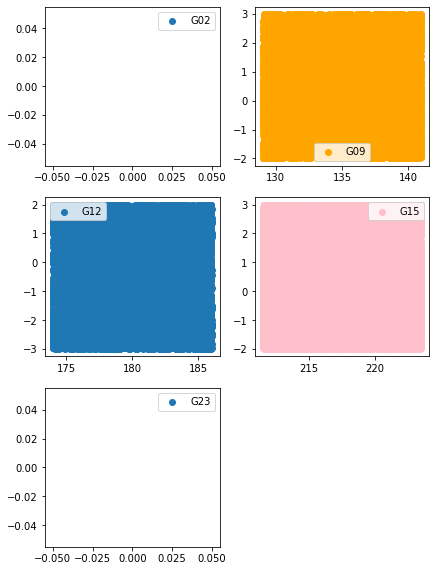

In [12]:
fig = plt.figure()
grid = plt.GridSpec(3,3, top = 2,right = 1.5)
ax = plt.subplot(grid[0,0])
plt.scatter(GP1_02['RA_1'],GP1_02['DEC_1'], label = "G02")
plt.legend()
ax = plt.subplot(grid[0,1])
plt.scatter(GP1_09['RA_1'],GP1_09['DEC_1'], label = "G09", color = 'orange')
plt.legend()
ax = plt.subplot(grid[1,0])
plt.scatter(GP1_12['RA_1'],GP1_12['DEC_1'], label = "G12")
plt.legend()
ax = plt.subplot(grid[1,1])
plt.scatter(GP1_15['RA_1'],GP1_15['DEC_1'], label = "G15", color = 'pink')
plt.legend()
ax = plt.subplot(grid[2,0])
plt.scatter(GP1_23['RA_1'],GP1_23['DEC_1'], label = "G23")
plt.legend()

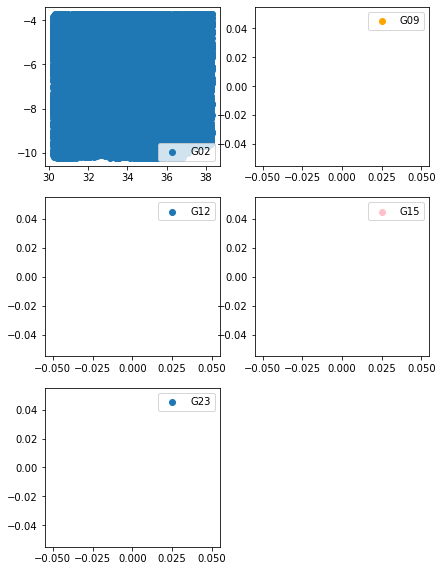

In [13]:
fig = plt.figure()
grid = plt.GridSpec(3,3, top = 2,right = 1.5)
ax = plt.subplot(grid[0,0])
plt.scatter(GP2_02['RA_1'],GP2_02['DEC_1'], label = "G02")
plt.legend()
ax = plt.subplot(grid[0,1])
plt.scatter(GP2_09['RA_1'],GP2_09['DEC_1'], label = "G09", color = 'orange')
plt.legend()
ax = plt.subplot(grid[1,0])
plt.scatter(GP2_12['RA_1'],GP2_12['DEC_1'], label = "G12")
plt.legend()
ax = plt.subplot(grid[1,1])
plt.scatter(GP2_15['RA_1'],GP2_15['DEC_1'], label = "G15", color = 'pink')
plt.legend()
ax = plt.subplot(grid[2,0])
plt.scatter(GP2_23['RA_1'],GP2_23['DEC_1'], label = "G23")
plt.legend()

In [17]:
GP2_02.columns

<TableColumns names=('OBJID','RA_1','DEC_1','flags','flags_r','type','rowc','colc','fiberMag_r','psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z','psfMagErr_u','psfMagErr_g','psfMagErr_r','psfMagErr_i','psfMagErr_z','petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z','petroMagErr_u','petroMagErr_g','petroMagErr_r','petroMagErr_i','petroMagErr_z','modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','modelMagErr_u','modelMagErr_g','modelMagErr_r','modelMagErr_i','modelMagErr_z','extinction_u','extinction_g','extinction_r','extinction_i','extinction_z','SPECID','SURVEY','SURVEY_CODE','RA_2','DEC_2','WMIN','WMAX','Z','NQ','PROB','FILENAME','URL','URL_IMG','CATAID','GAMA_NAME','IC_FLAG','DIST','IS_SBEST','IS_BEST','objID','uniquePspsSTid','ippObjID','surveyID','tessID','projectionID','skyCellID','randomStackObjID','primaryDetection','bestDetection','dvoRegionID','processingVersion','gippDetectID','gstackDetectID','gstackImageId','gra','gdec','graErr','gdecErr',

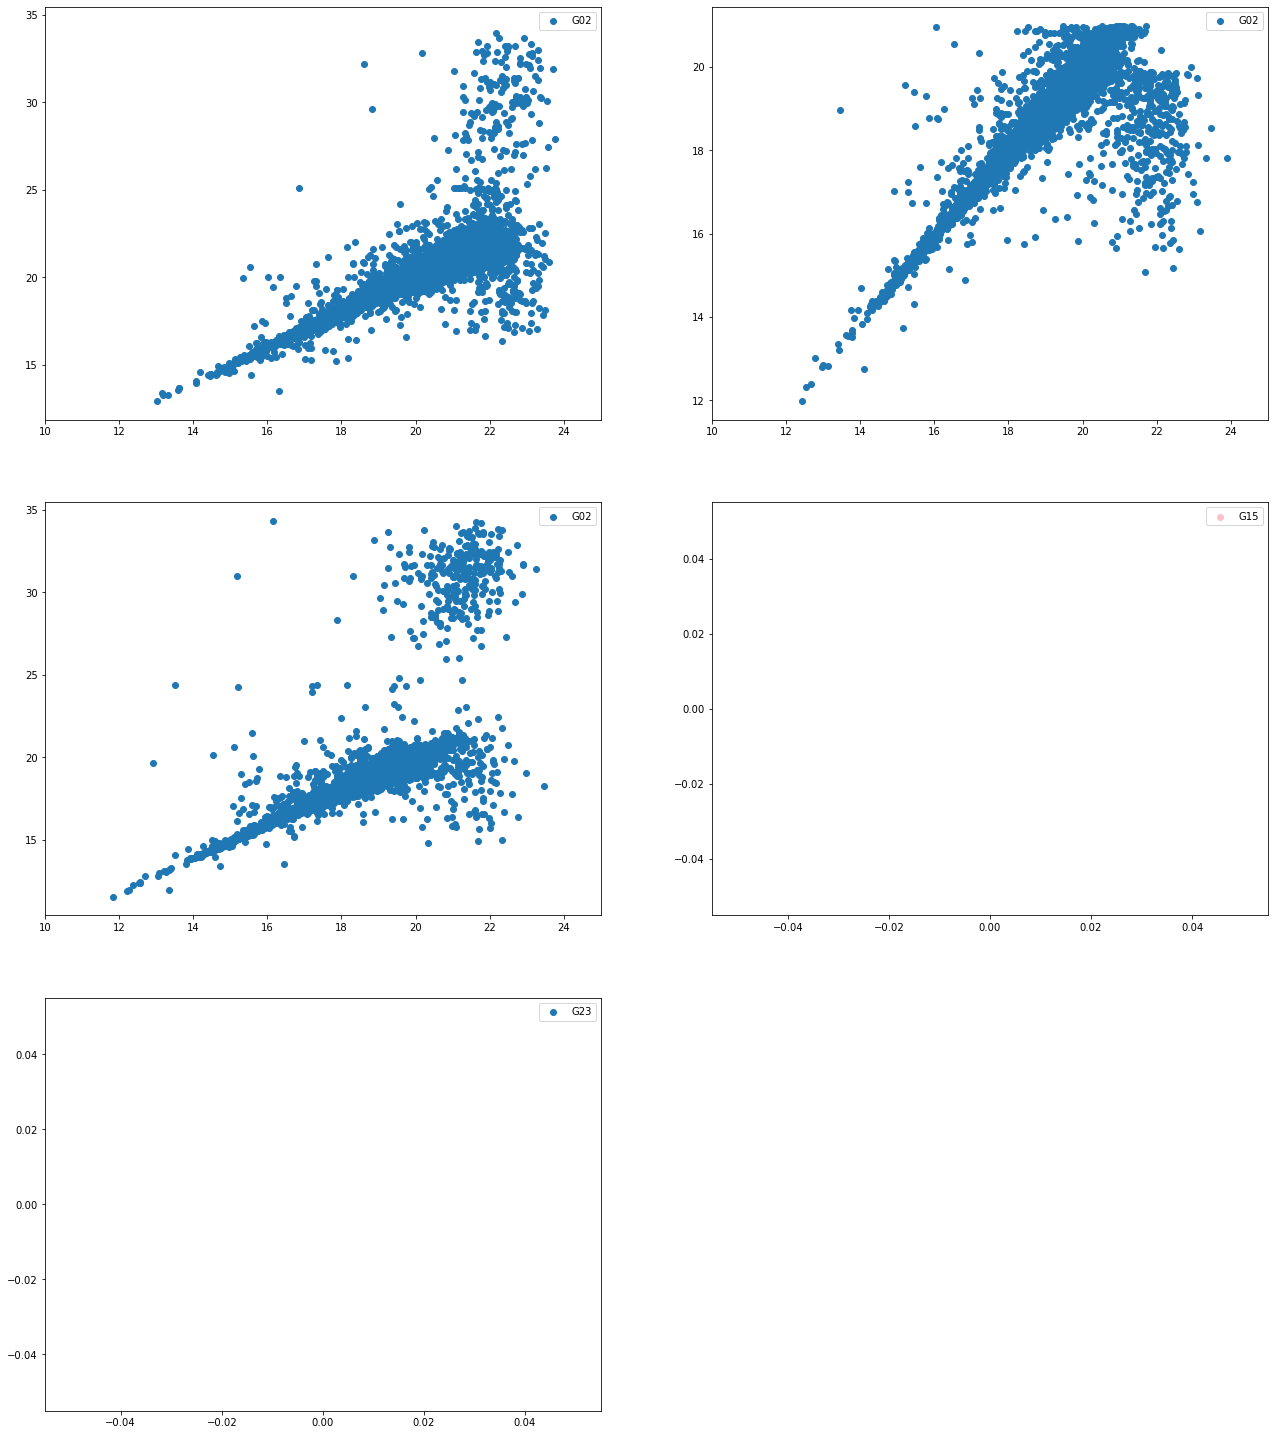

In [24]:
fig = plt.figure()
grid = plt.GridSpec(3,3, top = 5,right = 4.5)
ax = plt.subplot(grid[0,0])
plt.scatter(GP2_02['gKronMag'],GP2_02['petroMag_g'], label = "G02")
plt.xlim(10,25)
plt.legend()
ax = plt.subplot(grid[0,1])
plt.scatter(GP2_02['rKronMag'],GP2_02['petroMag_r'], label = "G02")
plt.xlim(10,25)
plt.legend()
ax = plt.subplot(grid[1,0])
plt.scatter(GP2_02['iKronMag'],GP2_02['petroMag_i'], label = "G02")
plt.xlim(10,25)
plt.legend()
ax = plt.subplot(grid[1,1])
plt.scatter(GP2_15['RA_1'],GP2_15['DEC_1'], label = "G15", color = 'pink')
plt.legend()
ax = plt.subplot(grid[2,0])
plt.scatter(GP2_23['RA_1'],GP2_23['DEC_1'], label = "G23")
plt.legend()

In [14]:
print(GP1_09['RA_1'].shape)
print(GP1_12['RA_1'].shape)
print(GP1_15['RA_1'].shape)
print(GP2_02['RA_1'].shape)
print(gama['RA'].shape)

(27239,)
(30250,)
(65902,)
(33228,)
(214624,)


In [ ]:
plt.scatter(GP1[''])

In [ ]:
fig = plt.figure()
grid = plt.GridSpec(3,2, top = 2,right = 1.5)
ax = plt.subplot(grid[0,:])
plt.scatter(GP1['RA_1'], GP1['DEC_1'], s = 50, color = 'red', label = 'GAMA x PS1')
plt.scatter(GP2['RA_1'], GP2['DEC_1'], s = 35, color = 'grey', label = 'GAMA 2 x PS1')
#plt.scatter(PF['RA'], PF['DEC'], s = 15, color = 'orange', label = 'PS1 x Filipe')
#plt.scatter(GD['RA'], GD['DEC'], s = 35, color = 'blue', label = 'GAMA x DES')

plt.legend()
ax = plt.subplot(grid[1,0])
plt.hist(GP1['RA_1'], label = 'GAMA x PS1 RA', color = 'red', bins = 100)
plt.hist(GP2['RA_1'], label = 'GAMA x PS1 RA 2', color = 'grey', bins = 100)
#plt.hist(PF['RA'], label = 'PS1 x Filipe', color = 'orange', bins = 100)

plt.legend()
ax = plt.subplot(grid[1,1])
#plt.hist(GD['RA'], label = 'GAMA x DES RA', color = 'blue', bins = 100)
plt.legend()
ax = plt.subplot(grid[2,0])
plt.hist(GP1['DEC_1'], label = 'GAMA x PS1 DEC', color = 'red', bins = 100)
plt.hist(GP2['DEC_1'], label = 'GAMA x PS1 DEC 2', color = 'grey', bins = 100)
#plt.hist(PF['DEC'], label = 'PS1 x Filipe', color = 'orange', bins = 100)

plt.legend()
ax = plt.subplot(grid[2,1])
#plt.hist(GD['DEC'], label = 'GAMA x DES DEC', color = 'blue', bins = 100)

plt.legend()

## Distribuição de RA e DEC

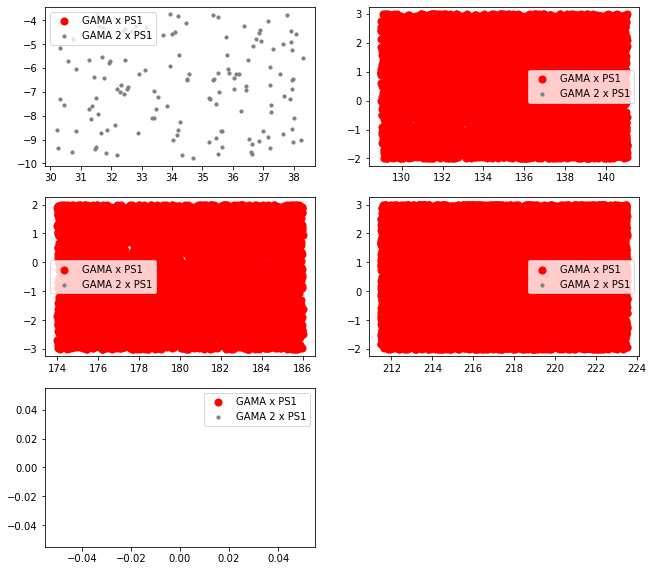

In [31]:
fig = plt.figure()
grid = plt.GridSpec(3,2, top = 2,right = 1.5)
ax = plt.subplot(grid[0,0])
plt.scatter(GP1_02['RA_1'], GP1_02['DEC_1'], s = 50, color = 'red', label = 'GAMA x PS1')
plt.scatter(GP2_02['RA_1'], GP2_02['DEC_1'], s = 10, color = 'grey', label = 'GAMA 2 x PS1')
#plt.scatter(GD_02['RA_1'], GD_02['DEC_1'], s = 2, color = 'blue', label = 'GAMA x DES')
plt.legend()
ax = plt.subplot(grid[0,1])
plt.scatter(GP1_09['RA_1'], GP1_09['DEC_1'], s = 50, color = 'red', label = 'GAMA x PS1')
plt.scatter(GP2_09['RA_1'], GP2_09['DEC_1'], s = 10, color = 'grey', label = 'GAMA 2 x PS1')
#plt.scatter(GD_09['RA_1'], GD_09['DEC_1'], s = 2, color = 'blue', label = 'GAMA x DES')
plt.legend()
ax = plt.subplot(grid[1,0])
plt.scatter(GP1_12['RA_1'], GP1_12['DEC_1'], s = 50, color = 'red', label = 'GAMA x PS1')
plt.scatter(GP2_12['RA_1'], GP2_12['DEC_1'], s = 10, color = 'grey', label = 'GAMA 2 x PS1')
#plt.scatter(GD_12['RA'], GD_12['DEC'], s = 2, color = 'blue', label = 'GAMA x DES')
plt.legend()
ax = plt.subplot(grid[1,1])
plt.scatter(GP1_15['RA_1'], GP1_15['DEC_1'], s = 50, color = 'red', label = 'GAMA x PS1')
plt.scatter(GP2_15['RA_1'], GP2_15['DEC_1'], s = 10, color = 'grey', label = 'GAMA 2 x PS1')
#plt.scatter(GD_15['RA'], GD_15['DEC'], s = 2, color = 'blue', label = 'GAMA x DES')
plt.legend()
ax = plt.subplot(grid[2,0])
plt.scatter(GP1_23['RA_1'], GP1_23['DEC_1'], s = 50, color = 'red', label = 'GAMA x PS1')
plt.scatter(GP2_23['RA_1'], GP2_23['DEC_1'], s = 10, color = 'grey', label = 'GAMA 2 x PS1')
#plt.scatter(GD_23['RA'], GD_23['DEC'], s = 2, color = 'blue', label = 'GAMA x DES')
plt.legend()

In [33]:
def separa_mag(table, band, min_, max_):
    region = table[table[band] > min_]
    region = region[region[band] <= max_]
    return region


In [34]:
mag1_GP1 = separa_mag(GP1, 'PETROMAG_R',0, 19.0) 
mag1_GP2 = separa_mag(GP2, 'petroMag_r',0, 19.0) 
#mag1_GD = separa_mag(GD, 'petroMag_i',0, 19.0) 

In [35]:
mag2_GP1 = separa_mag(GP1, 'PETROMAG_R',19.0, 19.8) 
mag2_GP2 = separa_mag(GP2, 'petroMag_r',19.0, 19.8) 
#mag2_GD = separa_mag(GD, 'petroMag_r',19.0, 19.8) 

In [36]:
mag3_GP1 = separa_mag(GP1, 'PETROMAG_R',19.8,10000000) 
mag3_GP2 = separa_mag(GP2, 'petroMag_r',19.8, 1000000) 
#mag3_GD = separa_mag(GD, 'PETROMAG_R',19.8, 1000000) 

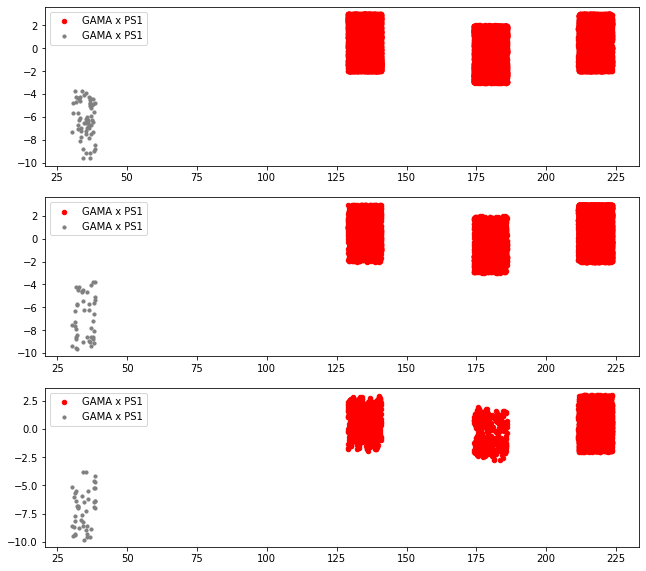

In [38]:
fig = plt.figure()
grid = plt.GridSpec(3,1, top = 2,right = 1.5)
ax = plt.subplot(grid[0,0])
plt.scatter(mag1_GP1['RA_1'], mag1_GP1['DEC_1'], s = 20, color = 'red', label = 'GAMA x PS1')
plt.scatter(mag1_GP2['RA_1'], mag1_GP2['DEC_1'], s = 10, color = 'grey', label = 'GAMA x PS1')
plt.legend()
ax = plt.subplot(grid[1,0])
plt.scatter(mag2_GP1['RA_1'], mag2_GP1['DEC_1'], s = 20, color = 'red', label = 'GAMA x PS1')
plt.scatter(mag2_GP2['RA_1'], mag2_GP2['DEC_1'], s = 10, color = 'grey', label = 'GAMA x PS1')
plt.legend()
ax = plt.subplot(grid[2,0])
plt.scatter(mag3_GP1['RA_1'], mag3_GP1['DEC_1'], s = 20, color = 'red', label = 'GAMA x PS1')
plt.scatter(mag3_GP2['RA_1'], mag3_GP2['DEC_1'], s = 10, color = 'grey', label = 'GAMA x PS1')
plt.legend()


## Distribuição de magnitudes (r)

(array([11.,  3.,  7.,  7.,  8.,  4.,  1.,  1.,  1.,  2.]),
 array([19.813028, 19.91993 , 20.026829, 20.13373 , 20.24063 , 20.34753 ,
        20.454432, 20.56133 , 20.668232, 20.775131, 20.882032],
       dtype=float32),
 <BarContainer object of 10 artists>)

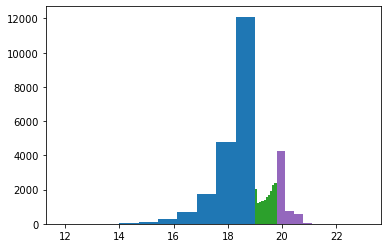

In [39]:
plt.hist(mag1_GP1['PETROMAG_R'])
plt.hist(mag1_GP2['petroMag_r'])
plt.hist(mag2_GP1['PETROMAG_R'])
plt.hist(mag2_GP2['petroMag_r'])
plt.hist(mag3_GP1['PETROMAG_R'])
plt.hist(mag3_GP2['petroMag_r'])

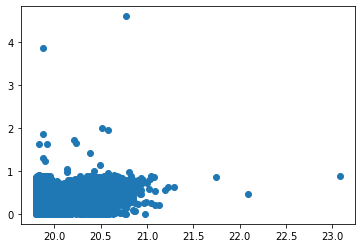

In [40]:
plt.scatter(mag3_GP1['PETROMAG_R'], mag3_GP1['Z'])

''

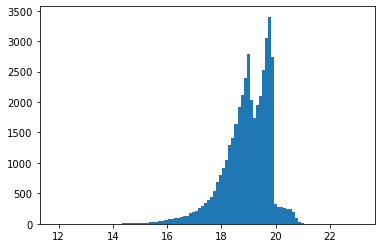

In [41]:
plt.hist(GP1['PETROMAG_R'], bins = 100)
;

''

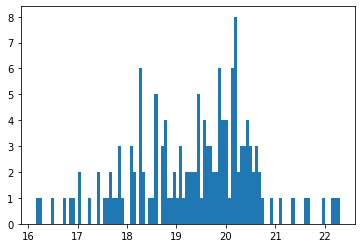

In [42]:
cut = GP2[GP2['rKronMag'] > 0 ]
plt.hist(cut['rKronMag'], bins = 100)
;

''

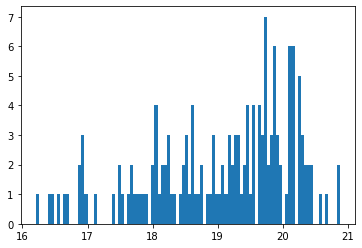

In [43]:
plt.hist(GP2['petroMag_r'], bins = 100)
;

In [47]:
def match(cat_1, cat_2, column_1, column_2, column_3, column_4,error):
    h = htm.HTM(depth=10)
    m1, m2, d12 = h.match(np.array(cat_1[column_1]), 
                          np.array(cat_1[column_3]),
                          np.array(cat_2[column_2]), 
                          np.array(cat_2[column_4]),
                          error, maxmatch=1)
    
    submatched = cat_1[m1]
    manmatched = cat_2[m2]
    matched = hstack([submatched, manmatched])
      
    return matched

def gluetable(path_dir, final_dest):
    tables = []
    for i,filename in enumerate(os.listdir(path_dir)):
        tables.append(Table.read(os.path.join(path_dir,filename)))
    table = vstack(tables)
    table.write(final_dest, overwrite = True)
    return table

def match_tables(table, path_dir, path_new, col1, col2, col3, col4, error):
    for i,filename in enumerate(os.listdir(path_dir)[0:10]):
        file_ = Table.read(os.path.join(path_dir,filename))
        data = match(table, file_,col1,col2,col3,col4,error)
        if len(data) != 0:
            if 'random' not in data.columns:
                data.add_column(1.5, name = 'random')
            for i in range(0, len(data)):
                data[i]['random'] = np.random.random()
            filename = 'match_' + filename
        data.write(os.path.join(path_new,filename))
    return None

In [23]:
path_dir = '/home/priscila/devel/mestrado/ps1/64'
array = np.array([])
for i,filename in enumerate(os.listdir(path_dir)[0:10]):
    file = Table.read(os.path.join(path_dir,filename))
    array = np.append(array,file['rKronMag'])

counts, bins = np.histogram(array, np.linspace(0, 30, 100))

c1, b1 = np.histogram(GP1['rKronMag'], bins = np.linspace(0,30, 100))
;


''

IndexError: index 2 is out of bounds for axis 0 with size 2

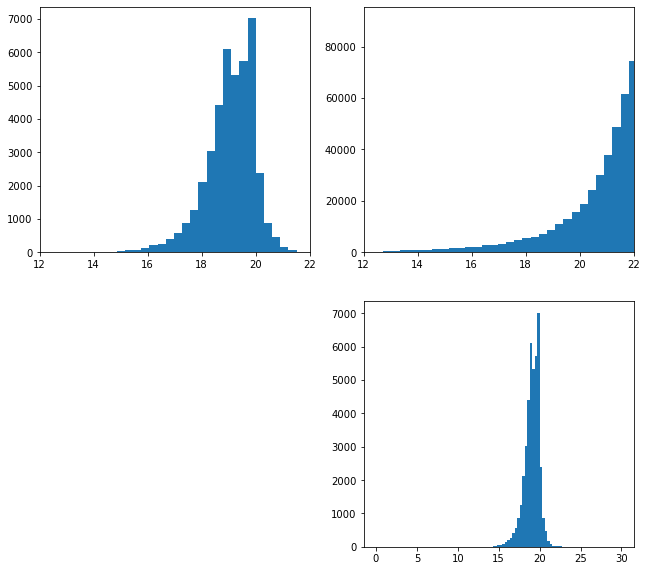

In [29]:
fig = plt.figure()
grid = plt.GridSpec(2,2, top = 2,right = 1.5)
ax = plt.subplot(grid[0,0])
plt.hist(CROSS_FINAL['rKronMag'],bins = np.linspace(0,30, 100))
plt.xlim(12,22)
ax = plt.subplot(grid[0,1])
plt.hist(array, bins=np.linspace(0,30, 100))
plt.xlim(12,22)
;
ax = plt.subplot(grid[1,1])
plt.hist(GP1['rKronMag'],bins = np.linspace(0,30, 100))
ax = plt.subplot(grid[2,1])
plt.hist(GP2['rKronMag'],bins = np.linspace(0,30, 100))

<ipython-input-26-167f59183977>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(b1[:-1], c1/counts)


''

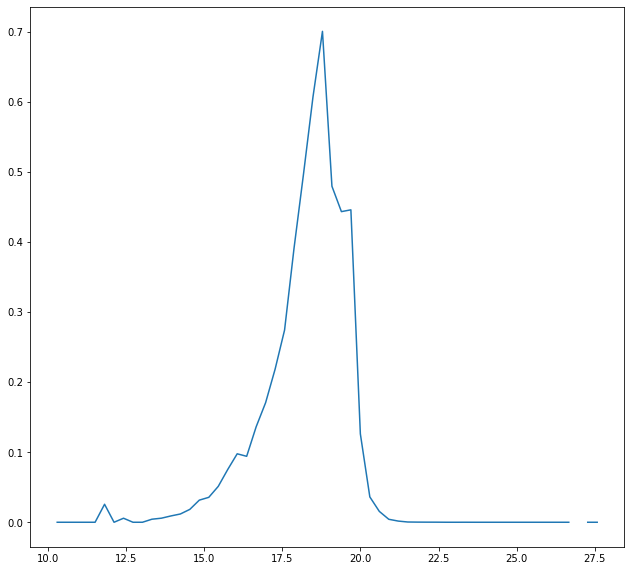

In [26]:
fig = plt.figure()
grid = plt.GridSpec(1,1, top = 2,right = 1.5)
ax = plt.subplot(grid[0,0])
plt.plot(b1[:-1], c1/counts)
;


## Compared densities

In [75]:
path_dir = '/home/priscila/devel/mestrado/ps1/64'
inputcat = Table.read('/home/priscila/devel/mestrado/InputCatA.fits')
inputcatg02 = Table.read('/home/priscila/devel/mestrado/G02SDSSInputCat.fits')
tab1 = match(gama, inputcat, 'RA','RA','DEC','DEC', 0000000.1)
tab2 = match(gama, inputcatg02, 'RA','RA','DEC','DEC', 0000000.1)
gama_g02 = Table.read('/home/priscila/devel/mestrado/G02SDSSInputCat.fits')

In [82]:
tab1

CATAID_1,OBJID_1,RA_1,DEC_1,FLAGS_1,PRIMTARGET_1,TYPE_1,PSFMAG_R_1,FIBERMAG_R_1,FLAGS_R_1,EXTINCTION_R_1,PETRORAD_R_1,PETROR90_R_1,PETROR50_R_1,PETROMAG_G_1,PETROMAG_R_1,PETROMAG_I_1,MODELMAG_U_1,MODELMAG_G_1,MODELMAG_R_1,MODELMAG_I_1,MODELMAG_Z_1,STATUS_1,RUN_1,MASK_IC_10_1,MASK_IC_12_1,MASK_SATUR_1,EXCEPTION_FLAG_1,CATAID_2,OBJID_2,RA_2,DEC_2,FLAGS_2,PRIMTARGET_2,TYPE_2,PSFMAG_R_2,FIBERMAG_R_2,FLAGS_R_2,EXTINCTION_R_2,PETRORAD_R_2,PETROR90_R_2,PETROR50_R_2,PETROMAG_G_2,PETROMAG_R_2,PETROMAG_I_2,MODELMAG_U_2,MODELMAG_G_2,MODELMAG_R_2,MODELMAG_I_2,MODELMAG_Z_2,STATUS_2,RUN_2,MASK_IC_10_2,MASK_IC_12_2,MASK_SATUR_2,EXCEPTION_FLAG_2
,,deg,deg,,,,mag,mag,,mag,arcsec,arcsec,arcsec,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,deg,deg,,,,mag,mag,,mag,arcsec,arcsec,arcsec,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,
int32,int64,float64,float64,int64,int32,int16,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int16,float32,float32,int16,int16,int32,int64,float64,float64,int64,int32,int16,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int16,float32,float32,int16,int16
6501,588848900983357489,173.02344476,0.82454875,68988047376,0,3,20.467966,20.052631,6755674587430928,0.078273386,4.4135365,4.386706,2.1116693,19.096539,18.677303,18.37647,20.104073,19.062872,18.654448,18.36817,18.285688,9843,756,0.0,0.0,0,0,6501,588848900983357489,173.02344476,0.82454875,68988047376,0,3,20.467966,20.052631,6755674587430928,0.078273386,4.4135365,4.386706,2.1116693,19.096539,18.677303,18.37647,20.104073,19.062872,18.654448,18.36817,18.285688,9843,756,0.0,0.0,0,0
6502,588848900983357521,173.04386343,0.71234731,68988047376,0,3,19.757301,19.723549,4503874773745680,0.0846572,2.5769794,3.3789449,1.1492608,19.594906,18.973673,18.84312,20.548244,19.443117,18.935814,18.819082,18.459164,9843,756,0.3621,0.3621,0,0,6502,588848900983357521,173.04386343,0.71234731,68988047376,0,3,19.757301,19.723549,4503874773745680,0.0846572,2.5769794,3.3789449,1.1492608,19.594906,18.973673,18.84312,20.548244,19.443117,18.935814,18.819082,18.459164,9843,756,0.3621,0.3621,0,0
6503,588848900983357523,173.05247407,0.72365263,70472092225880,0,3,21.135513,19.725977,4503874774138904,0.08408945,24.151089,20.980888,13.533253,17.042486,16.685234,20.969471,17.122042,16.805912,16.530853,21.860466,16.401226,9843,756,0.7879,0.7879,2,0,6503,588848900983357523,173.05247407,0.72365263,70472092225880,0,3,21.135513,19.725977,4503874774138904,0.08408945,24.151089,20.980888,13.533253,17.042486,16.685234,20.969471,17.122042,16.805912,16.530853,21.860466,16.401226,9843,756,0.7879,0.7879,2,0
6504,588848900983357524,173.05558268,0.7322801,158398662443024,0,3,20.74612,20.425217,4503874773745680,0.08370686,2.8001754,2.7218418,1.3053471,20.326576,19.612152,19.074207,21.431278,20.274801,19.56666,19.179455,19.239082,9843,756,0.264,0.264,0,0,6504,588848900983357524,173.05558268,0.7322801,158398662443024,0,3,20.74612,20.425217,4503874773745680,0.08370686,2.8001754,2.7218418,1.3053471,20.326576,19.612152,19.074207,21.431278,20.274801,19.56666,19.179455,19.239082,9843,756,0.264,0.264,0,0
6505,588848900983357543,173.05607838,0.81928364,1126003254628368,96,3,17.378538,16.979668,6755674587566096,0.08014712,33.216576,31.50578,14.681519,13.626061,13.031878,12.737476,15.285648,13.715451,13.005064,12.64638,12.4905405,26227,756,0.0,0.0,0,0,6505,588848900983357543,173.05607838,0.81928364,1126003254628368,96,3,17.378538,16.979668,6755674587566096,0.08014712,33.216576,31.50578,14.681519,13.626061,13.031878,12.737476,15.285648,13.715451,13.005064,12.64638,12.4905405,26227,756,0.0,0.0,0,0
6506,588848900983357558,173.05283934,0.81532499,68988043536,0,3,22.414545,19.30292,4503874773746960,0.080059476,43.769615,23.406675,14.976939,16.830845,17.643654,17.524061,16.381186,16.511574,17.210396,16.89218,15.327725,9843,756,0.0,0.0,0,0,6506,588848900983357558,173.05283934,0.81532499,68988043536,0,3,22.4

In [80]:
tab2 = match(gama, inputcatg02, 'RA','RA','DEC','DEC', 0000000.1)



CATAID_1,OBJID_1,RA_1,DEC_1,FLAGS_1,PRIMTARGET_1,TYPE_1,PSFMAG_R_1,FIBERMAG_R_1,FLAGS_R_1,EXTINCTION_R_1,PETRORAD_R_1,PETROR90_R_1,PETROR50_R_1,PETROMAG_G_1,PETROMAG_R_1,PETROMAG_I_1,MODELMAG_U_1,MODELMAG_G_1,MODELMAG_R_1,MODELMAG_I_1,MODELMAG_Z_1,STATUS_1,RUN_1,MASK_IC_10_1,MASK_IC_12_1,MASK_SATUR_1,EXCEPTION_FLAG_1,CATAID_2,OBJID_2,RA_2,DEC_2,FLAGS_2,PRIMTARGET_2,TYPE_2,PSFMAG_R_2,FIBERMAG_R_2,FLAGS_R_2,EXTINCTION_R_2,PETRORAD_R_2,PETROR90_R_2,PETROR50_R_2,PETROMAG_G_2,PETROMAG_R_2,PETROMAG_I_2,MODELMAG_U_2,MODELMAG_G_2,MODELMAG_R_2,MODELMAG_I_2,MODELMAG_Z_2,STATUS_2,RUN_2,MASK_IC_10_2,MASK_IC_12_2,MASK_SATUR_2,EXCEPTION_FLAG_2
,,deg,deg,,,,mag,mag,,mag,arcsec,arcsec,arcsec,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,deg,deg,,,,mag,mag,,mag,arcsec,arcsec,arcsec,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,
int32,int64,float64,float64,int64,int32,int16,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int16,float32,float32,int16,int16,int32,int64,float64,float64,int64,int32,int16,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int16,float32,float32,int16,int16
6501,588848900983357489,173.02344476,0.82454875,68988047376,0,3,20.467966,20.052631,6755674587430928,0.078273386,4.4135365,4.386706,2.1116693,19.096539,18.677303,18.37647,20.104073,19.062872,18.654448,18.36817,18.285688,9843,756,0.0,0.0,0,0,6501,588848900983357489,173.02344476,0.82454875,68988047376,0,3,20.467966,20.052631,6755674587430928,0.078273386,4.4135365,4.386706,2.1116693,19.096539,18.677303,18.37647,20.104073,19.062872,18.654448,18.36817,18.285688,9843,756,0.0,0.0,0,0
6502,588848900983357521,173.04386343,0.71234731,68988047376,0,3,19.757301,19.723549,4503874773745680,0.0846572,2.5769794,3.3789449,1.1492608,19.594906,18.973673,18.84312,20.548244,19.443117,18.935814,18.819082,18.459164,9843,756,0.3621,0.3621,0,0,6502,588848900983357521,173.04386343,0.71234731,68988047376,0,3,19.757301,19.723549,4503874773745680,0.0846572,2.5769794,3.3789449,1.1492608,19.594906,18.973673,18.84312,20.548244,19.443117,18.935814,18.819082,18.459164,9843,756,0.3621,0.3621,0,0
6503,588848900983357523,173.05247407,0.72365263,70472092225880,0,3,21.135513,19.725977,4503874774138904,0.08408945,24.151089,20.980888,13.533253,17.042486,16.685234,20.969471,17.122042,16.805912,16.530853,21.860466,16.401226,9843,756,0.7879,0.7879,2,0,6503,588848900983357523,173.05247407,0.72365263,70472092225880,0,3,21.135513,19.725977,4503874774138904,0.08408945,24.151089,20.980888,13.533253,17.042486,16.685234,20.969471,17.122042,16.805912,16.530853,21.860466,16.401226,9843,756,0.7879,0.7879,2,0
6504,588848900983357524,173.05558268,0.7322801,158398662443024,0,3,20.74612,20.425217,4503874773745680,0.08370686,2.8001754,2.7218418,1.3053471,20.326576,19.612152,19.074207,21.431278,20.274801,19.56666,19.179455,19.239082,9843,756,0.264,0.264,0,0,6504,588848900983357524,173.05558268,0.7322801,158398662443024,0,3,20.74612,20.425217,4503874773745680,0.08370686,2.8001754,2.7218418,1.3053471,20.326576,19.612152,19.074207,21.431278,20.274801,19.56666,19.179455,19.239082,9843,756,0.264,0.264,0,0
6505,588848900983357543,173.05607838,0.81928364,1126003254628368,96,3,17.378538,16.979668,6755674587566096,0.08014712,33.216576,31.50578,14.681519,13.626061,13.031878,12.737476,15.285648,13.715451,13.005064,12.64638,12.4905405,26227,756,0.0,0.0,0,0,6505,588848900983357543,173.05607838,0.81928364,1126003254628368,96,3,17.378538,16.979668,6755674587566096,0.08014712,33.216576,31.50578,14.681519,13.626061,13.031878,12.737476,15.285648,13.715451,13.005064,12.64638,12.4905405,26227,756,0.0,0.0,0,0
6506,588848900983357558,173.05283934,0.81532499,68988043536,0,3,22.414545,19.30292,4503874773746960,0.080059476,43.769615,23.406675,14.976939,16.830845,17.643654,17.524061,16.381186,16.511574,17.210396,16.89218,15.327725,9843,756,0.0,0.0,0,0,6506,588848900983357558,173.05283934,0.81532499,68988043536,0,3,22.4

In [72]:
def density(path_dir, gama):
    dir_ = os.listdir(path_dir)
    array = np.array([])
    for i,filename in enumerate(dir_)[0:10]:
        file = Table.read(os.path.join(path_dir,filename))
        file = file[file['rKronMag'] > 0 ]
        array = np.append(array,file['rKronMag'])
    array_gama = np.array(gama['PETROMAG_R'])
    c_gama ,bins_gama = np.histogram(array_gama, bins=np.linspace(10,30,1000))
    c_ps1,bins_ps1 = np.histogram(array, bins=np.linspace(10,30,1000))
    counts = np.array([])
    for i in range(0,len(c_ps1)):
        if c_ps1[i] != 0 and c_gama[i] != 0:
            counts = np.append(counts,int(([c_gama[i]]/c_ps1[i])*100))
        else:
            counts = np.append(counts,[0])
    plt.xlim(15,23)
    plt.ylim(0,0.04)
    plt.hist(bins_ps1[:-1], bins_ps1, weights=counts, density = True)
    



In [73]:
density(path_dir, tab)


NameError: name 'tab' is not defined

In [44]:
def density_two_catalogues(table1, table2):
    tabl1 = table1[table1['rKronMag'] > 0 ]
    array = np.array(table1['rKronMag'])
    array_gama = np.array(['PETROMAG_R'])
    c_gama ,bins_gama = np.histogram(array_gama, bins=np.linspace(0,30,1000))
    c_ps1,bins_ps1 = np.histogram(array, bins=np.linspace(0,30,1000))
    counts = np.array([])
    for i in range(0,len(c_ps1)):
        if c_ps1[i] != 0 and c_gama[i] != 0:
            counts = np.append(counts,int(([c_gama[i]]/c_ps1[i])*100))
        else:
            counts = np.append(counts,[0])
    return  plt.hist(bins_ps1[:-1], bins_ps1, weights=counts, density = True)


''

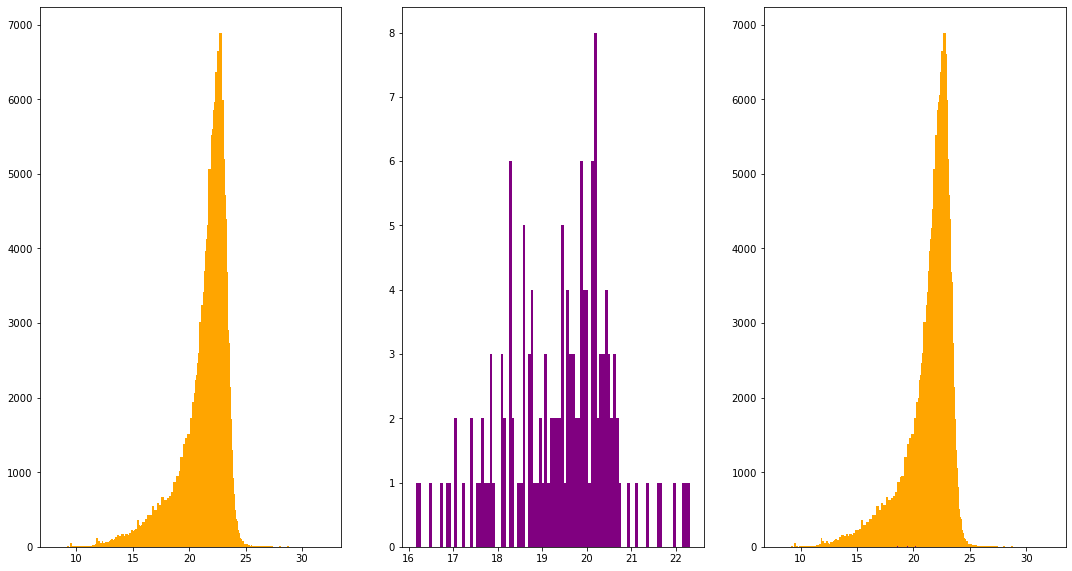

In [45]:
fig = plt.figure()
grid = plt.GridSpec(1,3, top = 2,right = 2.5)
ax = plt.subplot(grid[0,0])
path_dir = '/home/priscila/devel/mestrado/ps1/64'
hist_dir(path_dir,'rKronMag','orange')
ax = plt.subplot(grid[0,1])
plt.hist(cut['rKronMag'], bins = 100, color = 'purple')
ax = plt.subplot(grid[0,2])
hist_dir(path_dir,'rKronMag','orange')
plt.hist(cut['rKronMag'], bins = 100, color = 'purple')
;

(17.0, 18.0)

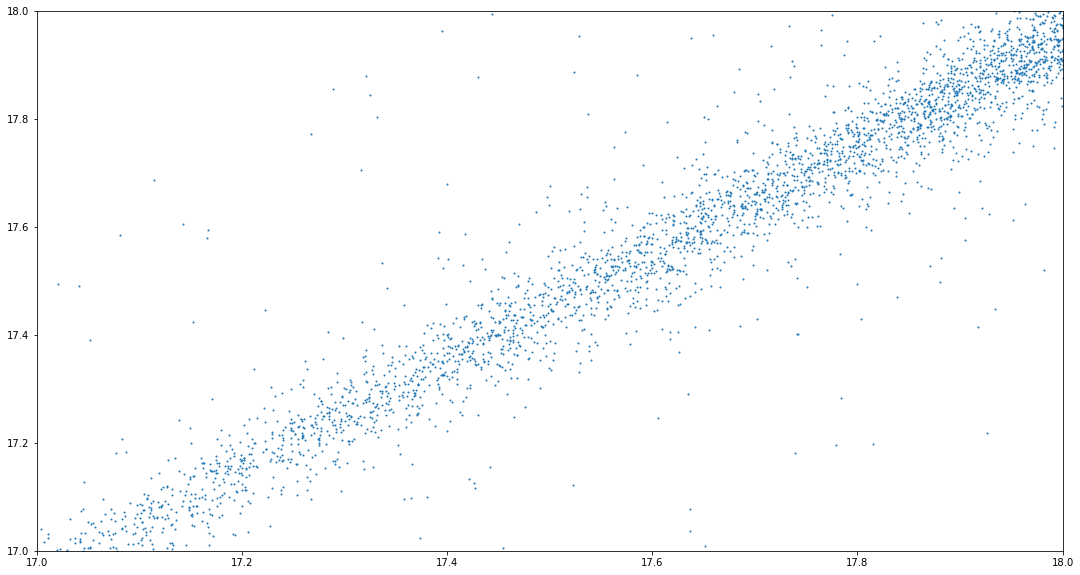

In [42]:
fig = plt.figure()
grid = plt.GridSpec(1,1, top = 2,right = 2.5)
ax = plt.subplot(grid[0,0])
plt.scatter(GP1['rKronMag'], GP1['PETROMAG_R'],s = 1)
plt.xlim(17, 18)
plt.ylim(17,18)

In [33]:
GP1.columns

<TableColumns names=('CATAID_1','OBJID','RA_1','DEC_1','FLAGS','PRIMTARGET','TYPE','PSFMAG_R','FIBERMAG_R','FLAGS_R','EXTINCTION_R','PETRORAD_R','PETROR90_R','PETROR50_R','PETROMAG_G','PETROMAG_R','PETROMAG_I','MODELMAG_U','MODELMAG_G','MODELMAG_R','MODELMAG_I','MODELMAG_Z','STATUS','RUN','MASK_IC_10','MASK_IC_12','MASK_SATUR','EXCEPTION_FLAG','SPECID','SURVEY','SURVEY_CODE','RA_2','DEC_2','WMIN','WMAX','Z','NQ','PROB','FILENAME','URL','URL_IMG','CATAID_2','GAMA_NAME','IC_FLAG','DIST','IS_SBEST','IS_BEST','objID','uniquePspsSTid','ippObjID','surveyID','tessID','projectionID','skyCellID','randomStackObjID','primaryDetection','bestDetection','dvoRegionID','processingVersion','gippDetectID','gstackDetectID','gstackImageId','gra','gdec','graErr','gdecErr','gEpoch','gPSFMag','gPSFMagErr','gApMag','gApMagErr','gKronMag','gKronMagErr','ginfoFlag','ginfoFlag2','ginfoFlag3','gnFrames','rippDetectID','rstackDetectID','rstackImageId','rra','rdec','rraErr','rdecErr','rEpoch','rPSFMag','rPSFMagErr'